In [10]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline


#removes all paranthesis and commas from the data, convert to float values
#assumes that a an opening paranthesis indicates a negative number
def make_float(x):
    if type(x) is float: #ignore exsiting 'nan'/float values
        return
    if "-" in x: #dash means there is no data for that year
        return float('nan')
    return float(x.replace("(", "-").replace(",","").replace(")",""))

city_budget = pd.read_csv('city_budget_data.csv')

city_budget["2015"] = city_budget["2015"].apply(make_float)
city_budget["2016"] = city_budget["2016"].apply(make_float)
city_budget["2017"] = city_budget["2017"].apply(make_float)
city_budget["2018"] = city_budget["2018"].apply(make_float)


fire_budget = city_budget[city_budget["Agency"] == "30 -  FIRE"]
fire_budget.reset_index(drop=True)


,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
0,30 - FIRE,30252 - FIRE INSPECTION ELEVATOR,Revenue,44 - LICENSES AND PERMITS,44230 - ELEVATOR PERMITS AND INSPECTS,-617670.0,-606447.0,-534775.0,-555937.0
1,30 - FIRE,30240 - FIRE GENERAL PREVENTION,Revenue,44 - LICENSES AND PERMITS,44245 - FIRE PERMITS,-396640.0,-416396.0,-401755.0,-553480.0
2,30 - FIRE,30240 - FIRE GENERAL PREVENTION,Revenue,47 - MISC REVENUE,47190 - MISCELLANEOUS REVENUE,-95363.0,-103890.0,-92455.0,-135419.0
3,30 - FIRE,30120 - FIRE MEDICAL PROGRAM GENERAL,Revenue,43 - CHARGES FOR SERVICES,43225 - SPECIAL DUTY,-83384.0,-104093.0,-128038.0,-73087.0
4,30 - FIRE,30114 - FIRE HAZARDOUS INCIDENT TEAM,Revenue,42 - INTERGOV REVENUES,42410 - OTHER UNIT OF GOV REVENUES OP,-57023.0,-61862.0,-56914.0,-45007.0
5,30 - FIRE,30110 - FIRE GEN FIELD OP,Revenue,42 - INTERGOV REVENUES,42210 - STATE REVENUES OPERATING,-47469.0,NaN,NaN,NaN
6,30 - FIRE,30110 - FIRE GEN FIELD OP,Revenue,43 - CHARGES FOR SERVICES,43710 - REIMBURSEMENT OF EXPENSE,-44871.0,-58561.0,-41825.0,-57251.0
7,30 - FIRE,30120 - FIRE MEDICAL PROGRAM GENERAL,Revenue,43 - CHARGES FOR SERVICES,43710 - REIMBURSEMENT OF EXPENSE,-35083.0,-68402.0,-65906.0,-48118.0
8,30 - FIRE,30121 - FIRE MEDICAL PROGRAM STATE,Revenue,42 - INTERGOV REVENUES,42210 - STATE REVENUES OPERATING,-24649.0,-28347.0,-25266.0,-22656.0
9,30 - FIRE,30251 - FIRE INSPECTION TANK PROGRAM,Revenue,42 - INTERGOV REVENUES,42210 - STATE REVENUES OPERATING,-24610.0,-24887.0,-28602.0,-29697.0


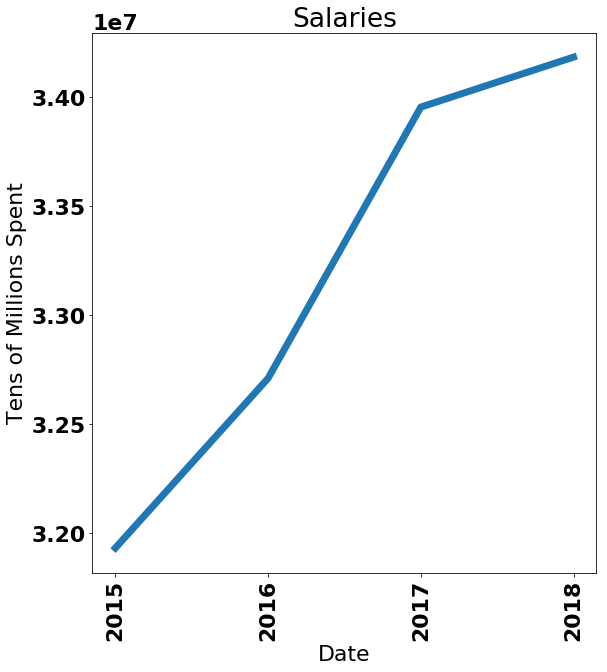

In [11]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

premium = dict()
premium["2015"] = fire_budget[fire_budget["Character Code"] == "51 - SALARIES"]["2015"].sum()
premium["2016"] = fire_budget[fire_budget["Character Code"] == "51 - SALARIES"]["2016"].sum()
premium["2017"] = fire_budget[fire_budget["Character Code"] == "51 - SALARIES"]["2017"].sum()
premium["2018"] = fire_budget[fire_budget["Character Code"] == "51 - SALARIES"]["2018"].sum()

premium_plot = pd.Series(premium)
premium_plot.plot.line(figsize = (10,10),linewidth=7.0)


# get the values we want displayed as tick labels
tick_labels = ("2015","2016","2017","2018","2019")
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.ylabel('Tens of Millions Spent')
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.title("Salaries")
plt.show()

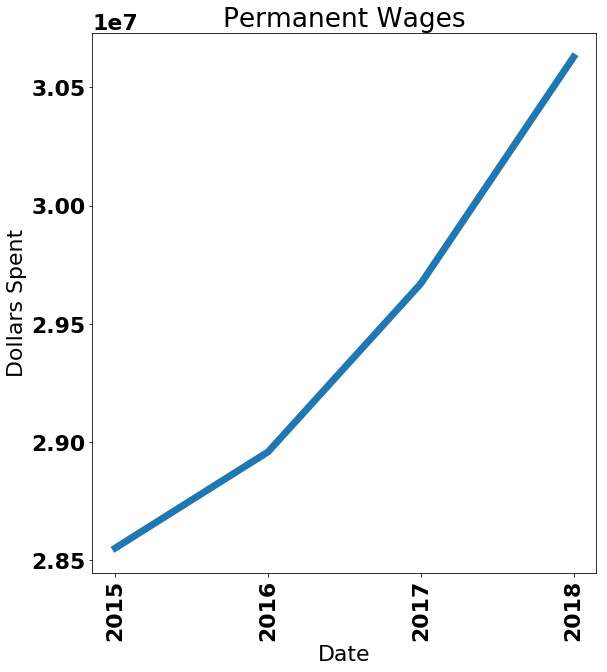

In [12]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)



expenses = dict()
expenses["2015"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2015"].sum()
expenses["2016"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2016"].sum()
expenses["2017"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2017"].sum()
expenses["2018"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2018"].sum()

expense_plot = pd.Series(expenses)
expense_plot.plot.line(figsize = (10,10),linewidth=7.0)


# get the values we want displayed as tick labels
tick_labels = ("2015","2016","2017","2018","2019")
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.ylabel('Dollars Spent')
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.title("Permanent Wages")
plt.show()

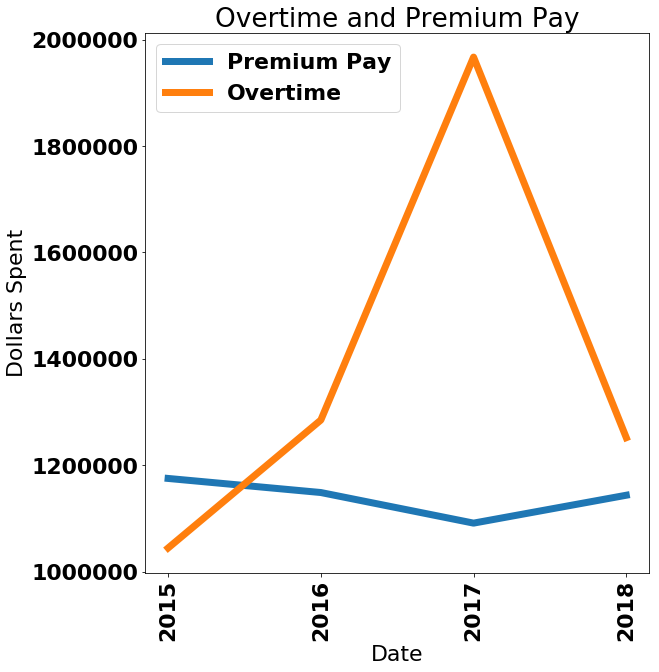

In [13]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

premium = dict()
premium["2015"] = fire_budget[fire_budget["Object"] == "51120 - PREMIUM PAY"]["2015"].sum()
premium["2016"] = fire_budget[fire_budget["Object"] == "51120 - PREMIUM PAY"]["2016"].sum()
premium["2017"] = fire_budget[fire_budget["Object"] == "51120 - PREMIUM PAY"]["2017"].sum()
premium["2018"] = fire_budget[fire_budget["Object"] == "51120 - PREMIUM PAY"]["2018"].sum()

premium_plot = pd.Series(premium)
premium_plot.plot.line(figsize = (10,10),linewidth=7.0, label = "Premium Pay")

overtime = dict()
overtime["2015"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2015"].sum()
overtime["2016"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2016"].sum()
overtime["2017"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2017"].sum()
overtime["2018"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2018"].sum()

expense_plot = pd.Series(overtime)
expense_plot.plot.line(figsize = (10,10),linewidth=7.0, label = "Overtime")


# get the values we want displayed as tick labels
tick_labels = ("2015","2016","2017","2018","2019")
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.ylabel('Dollars Spent')
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.title("Overtime and Premium Pay")
plt.legend()
plt.show()

In [14]:
import datetime

def drop_day(x):
    return str(x)[-4:]+"/"+str(x)[:2]

def drop_month(x):
    return str(x)[-4:]

def get_weekday(x):
    return datetime.datetime(int(x[6:]),int(x[:2]),int(x[3:5])).weekday()


daily_reports = pd.read_csv('FireDailyReports/fire_data_with_times.csv')
daily_reports = daily_reports.dropna(subset=["Date"])
daily_reports = daily_reports.reset_index()
daily_reports["Weekday"] = daily_reports["Date"].apply(get_weekday)
monthly_summary = daily_reports.copy()
yearly_summary = daily_reports.copy()
yearly_summary["Date"] = daily_reports["Date"].apply(drop_month)
monthly_summary["Date"] = daily_reports["Date"].apply(drop_day)




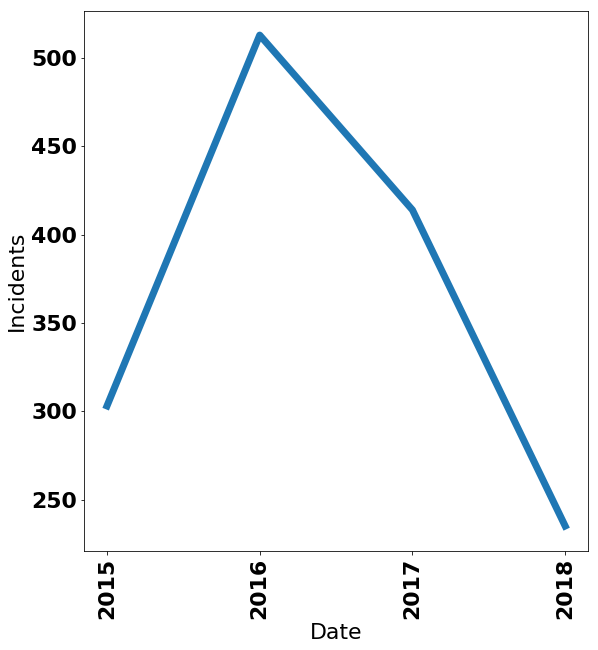

In [15]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

 
incidents = yearly_summary.groupby("Date").count()["index"].copy()
incidents["2015"] = incidents["2015"]/10*12
incidents = incidents.drop(["2019"])

incidents.plot.line(figsize = (10,10),linewidth=7.0)

# get the values we want displayed as tick labels
tick_labels = ("2015","2016","2017","2018","2019")
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.ylabel('Incidents')
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.show()

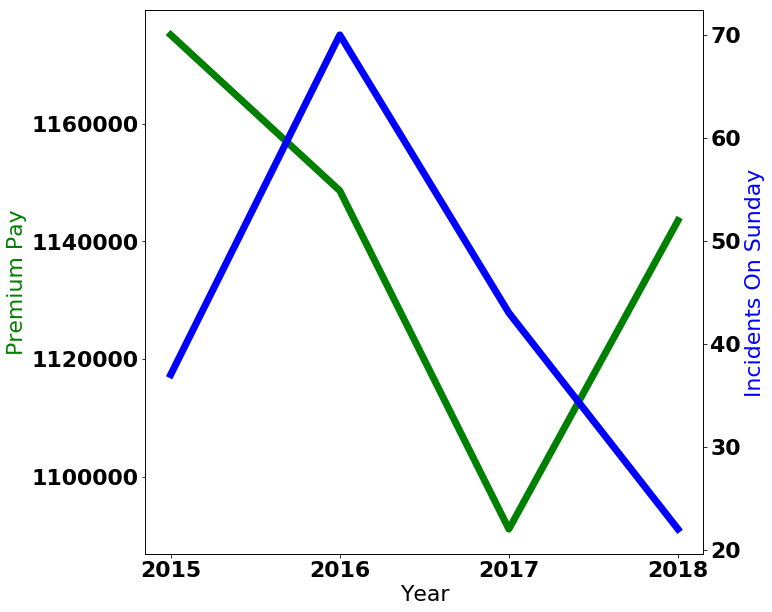

Date
2015    37
2016    70
2017    43
2018    22
Name: index, dtype: int64

In [38]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

 
incidents = yearly_summary[yearly_summary["Weekday"] == 6].groupby("Date").count()["index"]
incidents["2015"] = incidents["2015"]/10*12
incidents = incidents.drop(["2019"])



premium = dict()
premium["2015"] = fire_budget[fire_budget["Object"] == "51120 - PREMIUM PAY"]["2015"].sum()
premium["2016"] = fire_budget[fire_budget["Object"] == "51120 - PREMIUM PAY"]["2016"].sum()
premium["2017"] = fire_budget[fire_budget["Object"] == "51120 - PREMIUM PAY"]["2017"].sum()
premium["2018"] = fire_budget[fire_budget["Object"] == "51120 - PREMIUM PAY"]["2018"].sum()

premium_plot = pd.Series(premium)

tick_labels = ("2015","2016","2017","2018")


fig, ax1 = plt.subplots(figsize = (10,10))

ax2 = ax1.twinx()
ax1.plot(tick_labels, premium_plot, 'g-', linewidth=7.0)
ax2.plot(tick_labels, incidents, 'b-', linewidth=7.0)

ax1.set_xlabel('Year')
ax1.set_ylabel('Premium Pay', color="g")
ax2.set_ylabel('Incidents On Sunday', color="b")

plt.show()
incidents

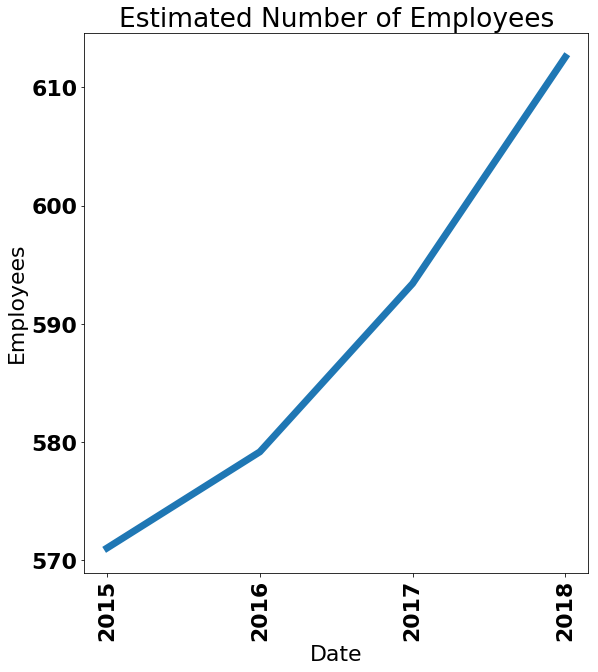

In [17]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)



expenses = dict()
expenses["2015"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2015"].sum()/50000
expenses["2016"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2016"].sum()/50000
expenses["2017"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2017"].sum()/50000
expenses["2018"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2018"].sum()/50000

expense_plot = pd.Series(expenses)
expense_plot.plot.line(figsize = (10,10),linewidth=7.0)



# get the values we want displayed as tick labels
tick_labels = ("2015","2016","2017","2018","2019")
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.ylabel('Employees')
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.title("Estimated Number of Employees")
plt.show()

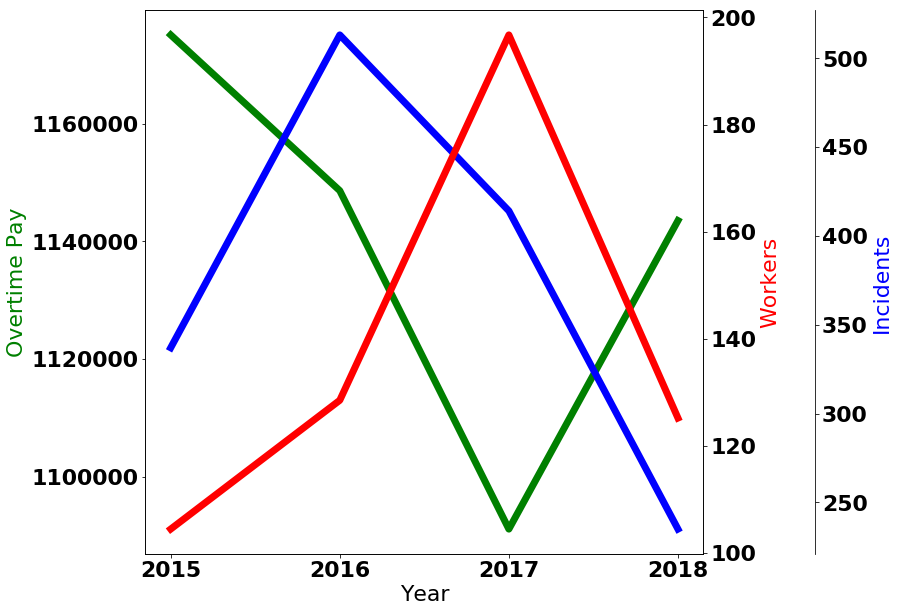

In [47]:

font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
        
        
incidents = yearly_summary.groupby("Date").count()["index"].copy()
incidents["2015"] = incidents["2015"]/9*12
incidents = incidents.drop(["2019"])


expenses = dict()
expenses["2015"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2015"].sum()/70000
expenses["2016"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2016"].sum()/70000
expenses["2017"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2017"].sum()/70000
expenses["2018"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2018"].sum()/70000

expense_plot = pd.Series(expenses)

overtime = dict()
overtime["2015"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2015"].sum()/10000
overtime["2016"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2016"].sum()/10000
overtime["2017"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2017"].sum()/10000
overtime["2018"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2018"].sum()/10000


expense_plot = pd.Series(overtime)


tick_labels = ("2015","2016","2017","2018")


fig, ax1 = plt.subplots(figsize = (10,10))

ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax2.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(ax2)
ax2.spines["right"].set_visible(True)

ax1.plot(tick_labels, premium_plot, 'g-', linewidth=7.0)
ax2.plot(tick_labels, incidents, 'b-', linewidth=7.0)
ax3.plot(tick_labels, expense_plot, 'r-', linewidth=7.0)

ax1.set_xlabel('Year')
ax1.set_ylabel('Overtime Pay', color="g")
ax2.set_ylabel('Incidents', color="b")
ax3.set_ylabel('Workers', color="r")

plt.show()


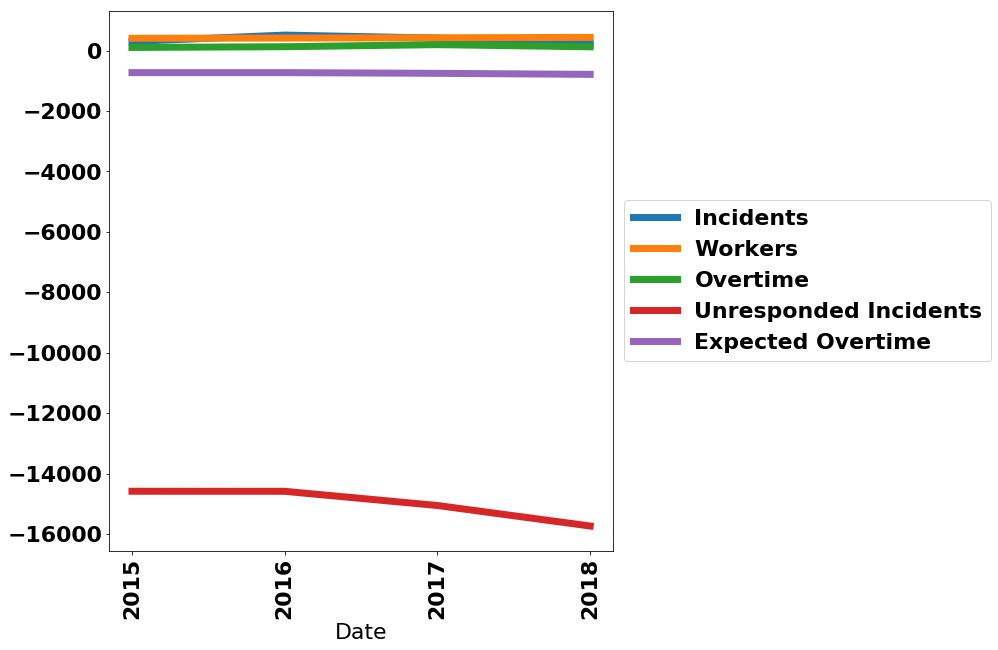

In [21]:
INCIDENTS_PER_WORKER_PER_YEAR = 1/10*1*365
COST_PER_INCIDENT_OVER = 500


font = {
        'weight' : 'bold',
        'size'   : 22}



plt.rc('font', **font)

 
incidents = yearly_summary.groupby("Date").count()["index"].copy()
incidents["2015"] = incidents["2015"]/10*12
incidents = incidents.drop(["2019"])

incidents.plot.line(figsize = (10,10),linewidth=7.0, label = "Incidents")

expenses = dict()
expenses["2015"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2015"].sum()/70000
expenses["2016"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2016"].sum()/70000
expenses["2017"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2017"].sum()/70000
expenses["2018"] = fire_budget[fire_budget["Object"] == "51110 - PERMANENT WAGES"]["2018"].sum()/70000

expense_plot = pd.Series(expenses)
expense_plot.plot.line(figsize = (10,10),linewidth=7.0, label = "Workers")

overtime = dict()
overtime["2015"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2015"].sum()/10000
overtime["2016"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2016"].sum()/10000
overtime["2017"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2017"].sum()/10000
overtime["2018"] = fire_budget[fire_budget["Object"] == "51310 - OVERTIME WAGES PERMANENT"]["2018"].sum()/10000


expense_plot = pd.Series(overtime)
expense_plot.plot.line(figsize = (10,10),linewidth=7.0, label = "Overtime")


expected_overtime = dict()
expected_overtime["2015"] = incidents["2015"]-(expenses["2015"]*INCIDENTS_PER_WORKER_PER_YEAR)
expected_overtime["2016"] = incidents["2016"]-(expenses["2016"]*INCIDENTS_PER_WORKER_PER_YEAR)
expected_overtime["2017"] = incidents["2017"]-(expenses["2017"]*INCIDENTS_PER_WORKER_PER_YEAR)
expected_overtime["2018"] = incidents["2018"]-(expenses["2018"]*INCIDENTS_PER_WORKER_PER_YEAR)

expense_plot = pd.Series(expected_overtime)
expense_plot.plot.line(figsize = (10,10),linewidth=7.0, label = "Unresponded Incidents")


expected_overtime["2015"] = expected_overtime["2015"]*COST_PER_INCIDENT_OVER/10000
expected_overtime["2016"] = expected_overtime["2016"]*COST_PER_INCIDENT_OVER/10000
expected_overtime["2017"] = expected_overtime["2017"]*COST_PER_INCIDENT_OVER/10000
expected_overtime["2018"] = expected_overtime["2018"]*COST_PER_INCIDENT_OVER/10000

expense_plot = pd.Series(expected_overtime)
expense_plot.plot.line(figsize = (10,10),linewidth=7.0, label = "Expected Overtime")

# get the values we want displayed as tick labels
tick_labels = ("2015","2016","2017","2018","2019")
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.yticks()
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()